In [1]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},
        
        style='darkgrid')

In [2]:
df = pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/최종 데이터프레임 기온 + 강수량 + 미세먼지 + 초미세먼지 + 연\월\일\요일.csv', parse_dates=True)
df.drop(['Unnamed: 0'], axis=1, inplace = True)
train = df.copy()
train = train.iloc[:, :5]
train['일시'] = pd.to_datetime(train['일시'])
train.set_index('일시', inplace=True)

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

gu = ['광진구', '동대문구', '성동구', '중랑구']
plt.rcParams["figure.figsize"] = [12, 6]
# 시계열 성분 분해
def time_series_decomposition(df, modeln, list, periodn):
  for i in list:
    seasonal_decompose(df[i], model= modeln, period=periodn).plot()
  return 0

0

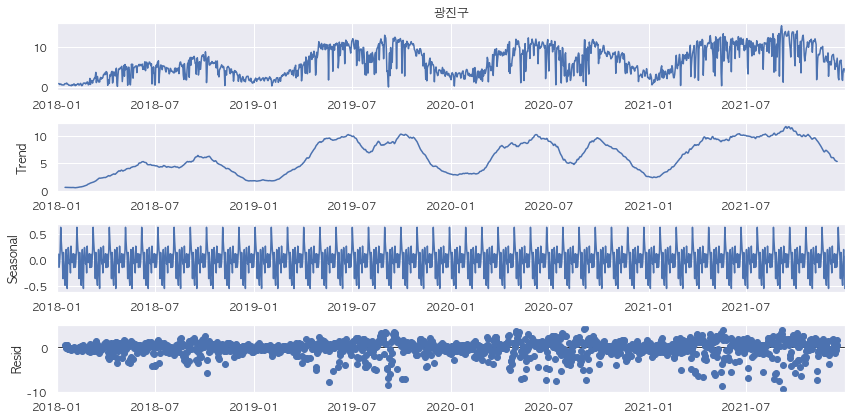

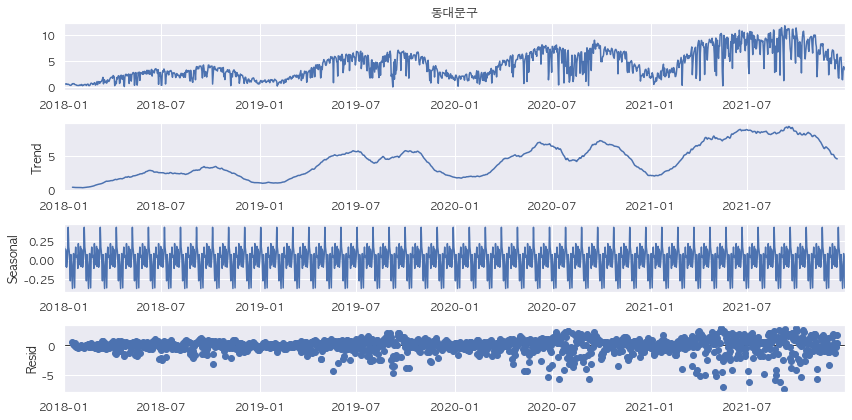

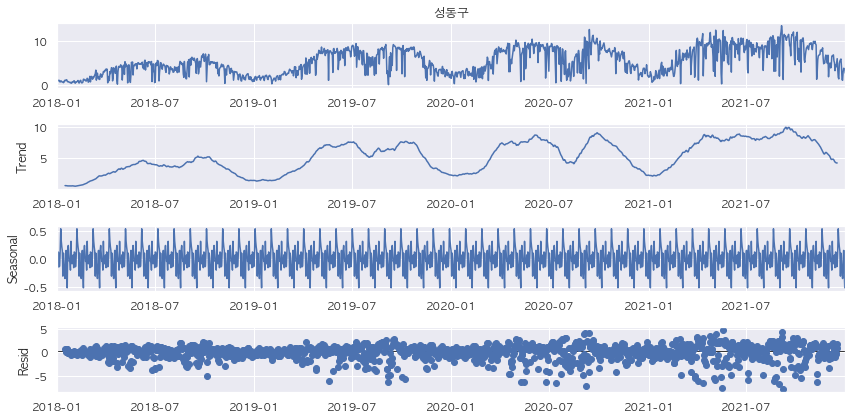

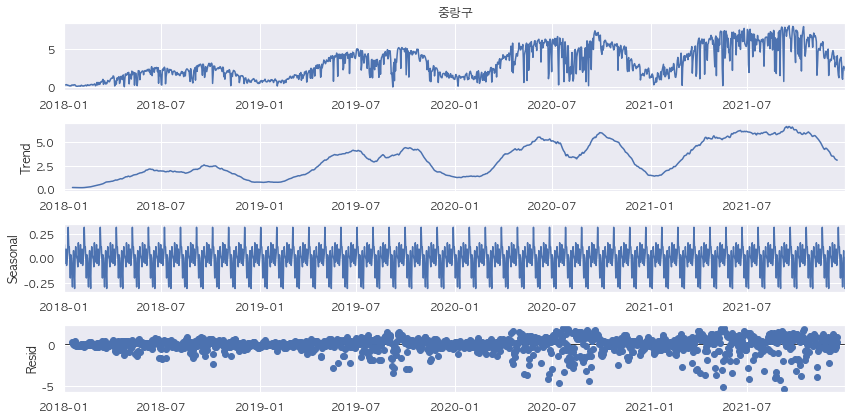

In [4]:
time_series_decomposition(train, 'Additive', gu, 30)

0

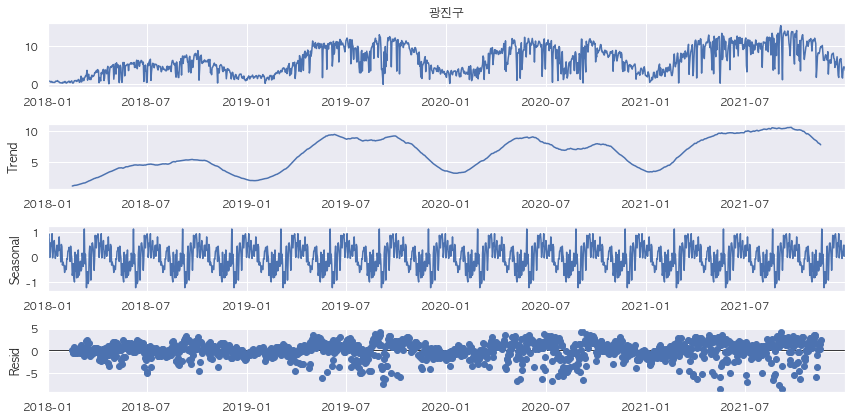

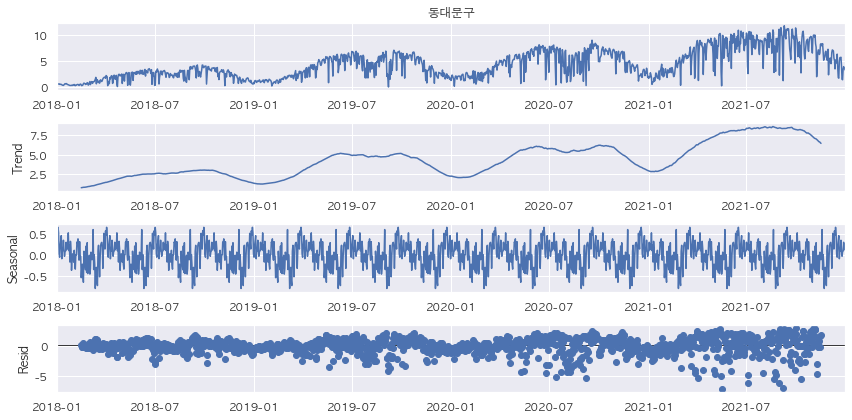

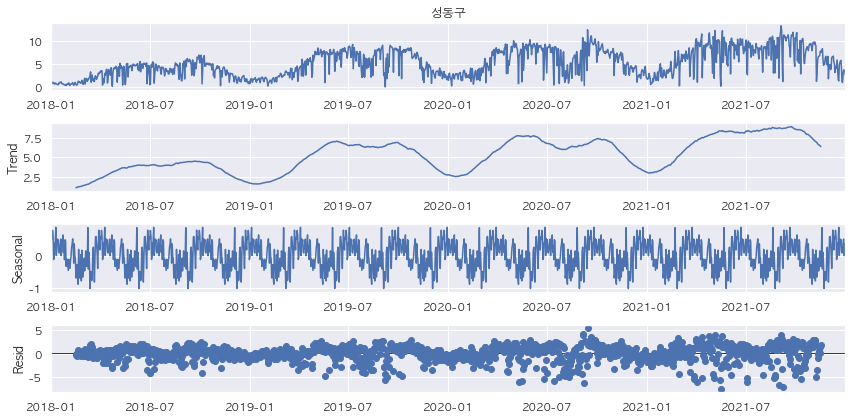

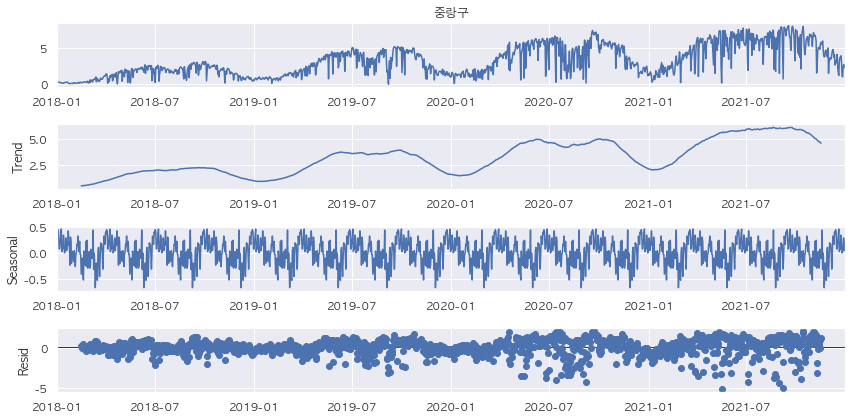

In [5]:
time_series_decomposition(train, 'Additive', gu, 90)

0

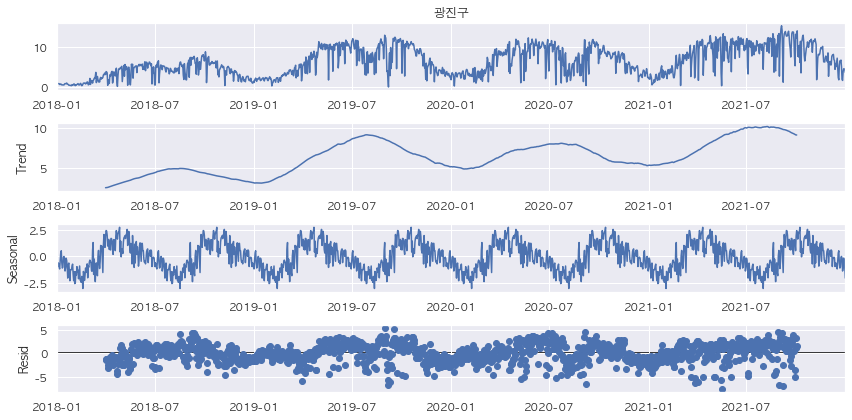

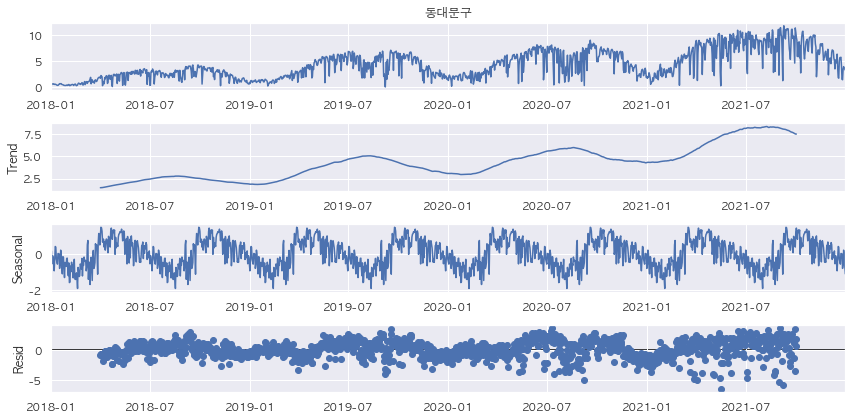

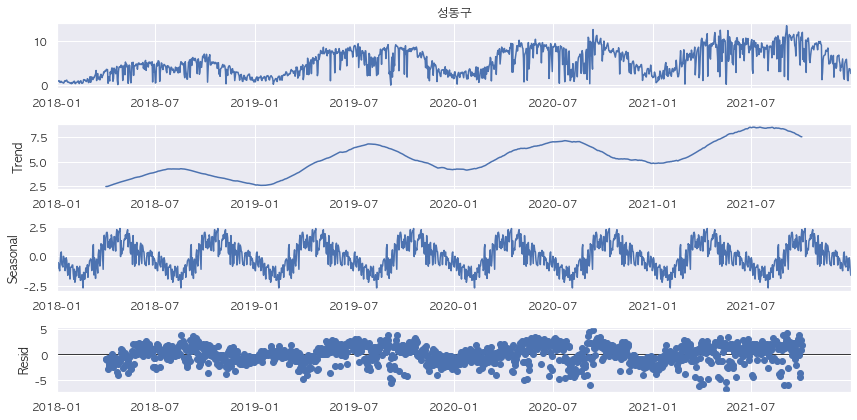

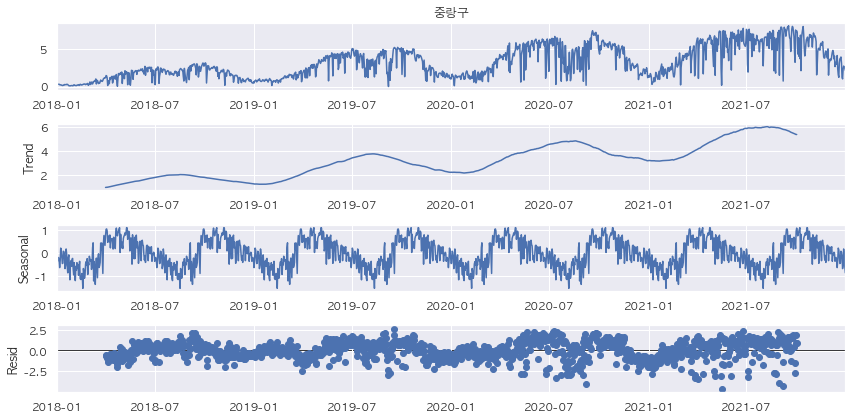

In [6]:
time_series_decomposition(train, 'Additive', gu, 180)

0

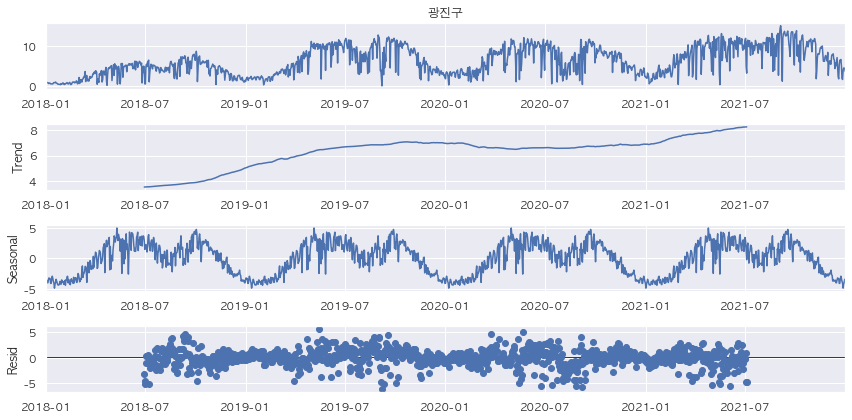

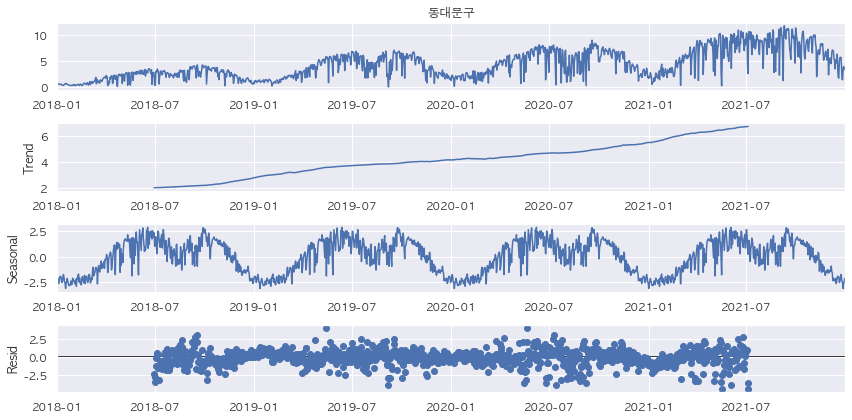

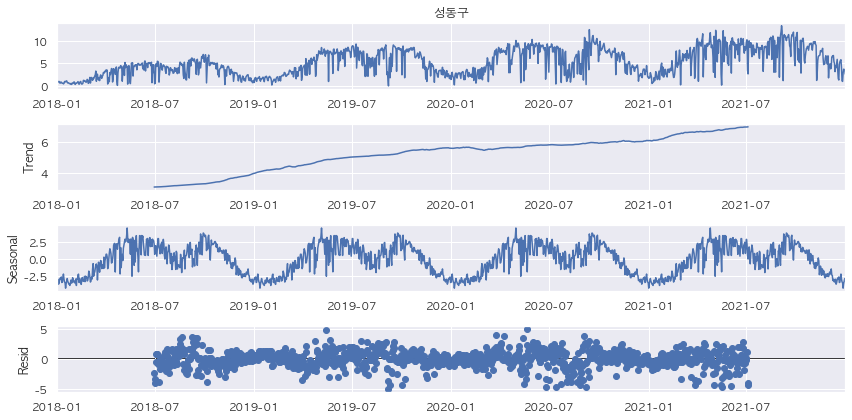

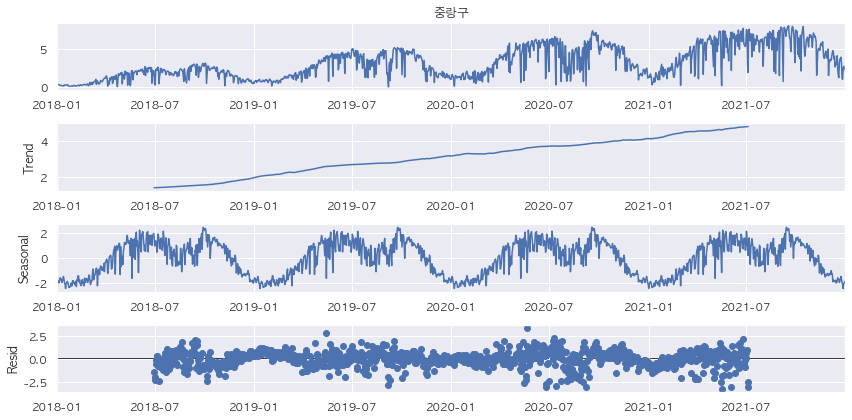

In [7]:
time_series_decomposition(train, 'Additive', gu, 360)

시계열 분해 결과로 나온 각각의 그래프가 어떤 개형을 가져야하는지는 상황에 따라 달라질 수 있습니다.

일반적으로, 시계열 데이터에서 추세는 점진적으로 상승하거나 하강하며, 주기성은 일정한 주기를 가지고 반복되는 형태를 갖는 것이 일반적입니다. 따라서 추세 그래프는 일정한 경사를 가지는 것이 바람직하고, 주기성 그래프는 일정한 주기로 반복되는 모양새를 보이는 것이 바람직합니다.

잔차 그래프는 랜덤하게 흩어지는 모양새가 되어야 하며, 이것이 만족되지 않는다면 더 좋은 모델을 찾아볼 필요가 있습니다.

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 위 모델은 주어진 시계열 데이터 series와 시차(lag) k에 대한 부분 자기 상관 계수(PACF)를 계산하여 plot을 그려주는 함수입니다.
#### PACF는 ACF와 달리 이전의 시차들에 대한 영향력을 제거한 상태로 특정 시차 k의 영향력만을 측정합니다. 따라서 PACF 함수를 통해 시계열 데이터에서 특정 시차의 영향력을 보다 정확하게 파악할 수 있습니다.

자기상관계수(ACF)와 부분자기상관계수(PACF)의 값이 0에 가까울수록 더 올바른 값입니다. 
이는 시계열 데이터가 대부분 상대적으로 안정적인 평균과 분산을 가지기 때문입니다. 
따라서 시계열 데이터에서는 평균 근처에서 데이터가 진동하는 것을 예상하므로, 시간 지연이 증가할수록 자기 상관계수 값은 0으로 수렴해야 합니다.

### 시계열 데이터에서 정상성이란?
#### 시계열 데이터에서 정상성(stationarity)은 시계열 데이터가 시간에 따라 일정한 평균(mean)과 분산(variance)을 가지며, 시간의 추이에 따라 자기공분산(lag)이 변하지 않는 특성을 의미합니다. 즉, 정상성을 가진 시계열 데이터는 시간에 무관하게 일정한 분포를 유지하며, 미래의 값들을 예측할 때 현재의 값이나 과거의 값과 상관없이 일정한 경향성을 보입니다. 이러한 시계열 데이터는 예측 분석을 수행하기 위해 필요한 전제 조건 중 하나입니다.

## ACF, PACF 확인 

ACF(Autocorrelation Function)는 시계열 데이터에서 lag(시차)를 기준으로 자기상관을 나타내는 함수이며, lag가 커질수록 자기상관이 감소하게 됩니다.

따라서 ACF 값이 전체적으로 높다면, 시차가 증가해도 자기상관이 감소하지 않는 것이므로 과거 시차와 현재 시점의 관계가 강하게 남아있는 것입니다. 이는 시계열 데이터가 정상성을 띄지 않는 경우에 나타날 수 있는 특징 중 하나입니다.



In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def ACF_PACF(x, lags):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    plot_acf(x=x, lags=lags, ax=ax[0])
    # plt.title(f'acf plot lags = {lags}')

    plot_pacf(x=x, lags=lags, ax=ax[1])
    # plt.title(f'pacf plot lags = {lags}')
    plt.show()
              
    return

    

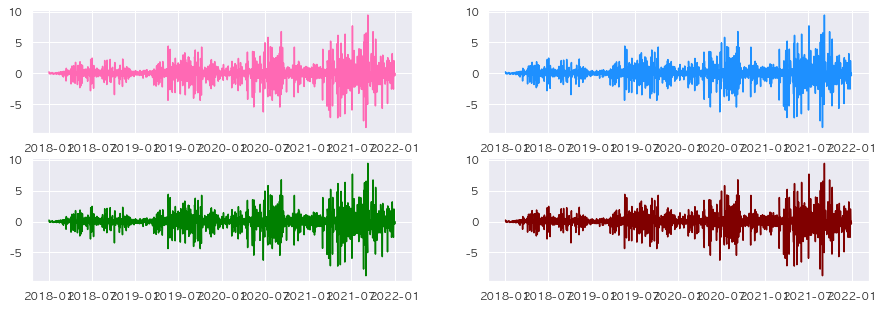

In [11]:
# 로그변환을 하지 않으면 계절성이 조금 남아있는 것을 확인 가능 차분만 진행한 것
fig, ax = plt.subplots(2, 2, figsize=(15,5))
colors = ['hotpink', 'dodgerblue', 'green', 'maroon']
for i, item in enumerate(gu):
    diff = train['동대문구'].diff().dropna()
    ax[i // 2, i % 2].plot(diff, color=colors[i])
plt.show()

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


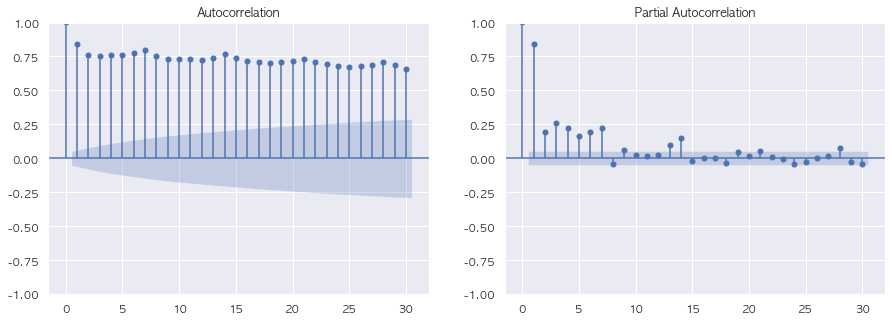

In [12]:
# 로그 차분 안한거
ACF_PACF(train['동대문구'], 30)

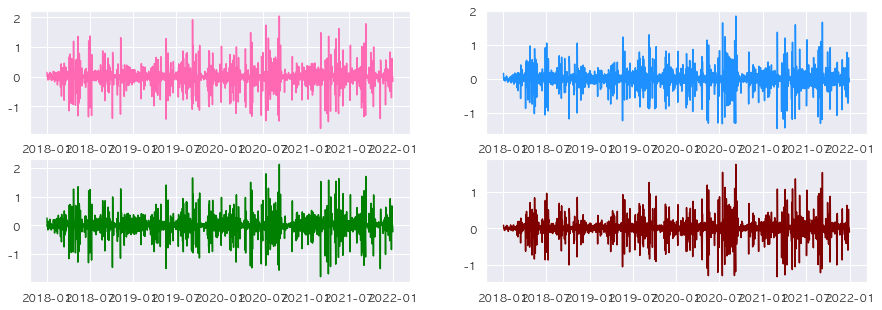

In [13]:
# 로그변환을 하니 정상성을 제대로 띄는 것을 확인할 수 있음
fig, ax = plt.subplots(2, 2, figsize=(15,5))
colors = ['hotpink', 'dodgerblue', 'green', 'maroon']
for i, item in enumerate(gu):
    log_gu = np.log1p(train[item])
    diff = log_gu.diff().dropna()
    ax[i // 2, i % 2].plot(diff, color=colors[i])
plt.show()

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


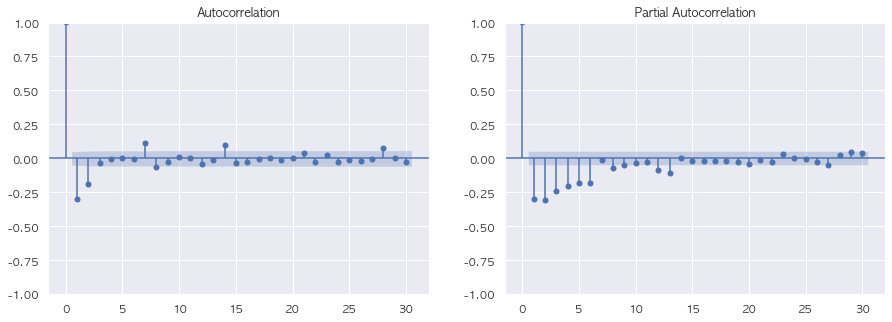

In [14]:
# 로그 - 차분 한 것

log_gu = np.log1p(train['동대문구'])
diff = log_gu.diff().dropna()

ACF_PACF(diff, 30)

# 이 밑에 있는 ARIMA SARIMA 모델은 무슨 이유인지는 모르지만 예측이 잘 되지 않아 파악중...

## ARIMA

In [15]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA 모델에서 AR(Autoregressive) 계수와 MA(Moving Average) 계수를 선택하는 기준은 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function) 그래프를 통해 결정할 수 있습니다.

ACF 그래프는 각 시차(lag)별로 관측치 간의 상관관계를 보여주는데, 시차가 증가할수록 상관관계는 줄어들게 됩니다. 따라서 AR 모델에서는 ACF 그래프가 서서히 감소하면서 절단점(cut-off point) 이후에는 0에 가까워지는 형태를 보이는 경우가 많습니다.

PACF 그래프는 다른 시차의 영향력을 제거한 후, 해당 시차와의 상관관계만을 보여주는 그래프로, PACF 그래프는 AR 모델에서만 유의미한 값들을 보여줍니다. 따라서 PACF 그래프에서는 절단점 이후의 값이 0이 되는 경우가 많은데, 이를 통해 AR 모델의 차수를 결정할 수 있습니다.

반면 MA 모델에서는 ACF 그래프가 절단점 이후에 바로 0이 되는 형태를 보입니다. 따라서 MA 모델에서는 ACF 그래프를 통해 MA 모델의 차수를 결정할 수 있습니다.

ARIMA 모델에서는 ACF와 PACF 그래프를 모두 고려하여 AR과 MA 모델의 차수를 결정하게 됩니다. 이를 통해 ARIMA 모델의 차수(p, d, q)를 결정하게 됩니다.

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/m

<AxesSubplot:xlabel='일시'>

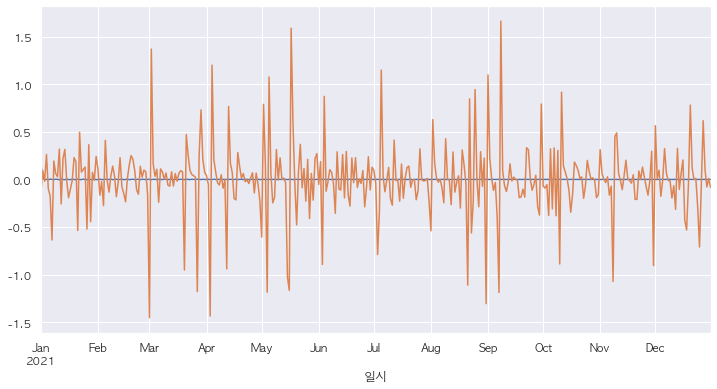

In [16]:
log_gu = np.log1p(train['동대문구'])
diff = log_gu.diff().dropna()
# 데이터를 훈련용 데이터와 테스트용 데이터로 나누기
train_data = diff.loc["2018-01-01":"2020-12-31"]
test_data = diff.loc["2021-01-01":]

# ARIMA 모델 훈련
model = ARIMA(train_data, order=(3, 1, 7))
result = model.fit()

# 테스트용 데이터 예측
start_index = test_data.index.min()
end_index = test_data.index.max()
forecast = result.predict(start=start_index, end=end_index, typ='levels')

# 예측 결과 시각화
forecast.plot()
test_data.plot()

ARIMA 모델에서 예측값이 거의 0에 근접하게 나오는 경우, 다음과 같은 이유가 있을 수 있습니다.<br>

모델의 계수(AR, MA, 차분)가 적절하지 않을 경우
모델의 계수가 잘못 설정되면 예측값이 크게 왜곡될 수 있습니다. 모델을 재조정하여 예측값을 개선할 수 있습니다.<br>
데이터가 과거와 현재의 패턴이 다르게 변화한 경우
ARIMA 모델은 과거의 패턴을 반영하기 때문에 데이터가 미래로 갈수록 예측 불확실성이 커집니다. <br>데이터가 과거와 현재의 패턴이 다르게 변화하면 모델의 예측 불확실성이 증가하게 됩니다. 이 경우 다른 모델을 고려하거나 예측기간을 축소할 수 있습니다.<br>
예측 구간이 매우 길 경우 예측 불확실성이 높아집니다. 이 경우 예측 구간을 줄이거나 다른 모델을 사용할 수 있습니다.<br>
이 외에도 데이터가 너무 적거나 너무 많은 경우, 시계열의 특성이 제대로 반영되지 않은 경우 등이 예측값이 0에 근접하게 나오는 원인이 될 수 있습니다. 이런 경우 모델을 다시 검토하고 예측 구간을 조절하여 예측을 개선해야 합니다.

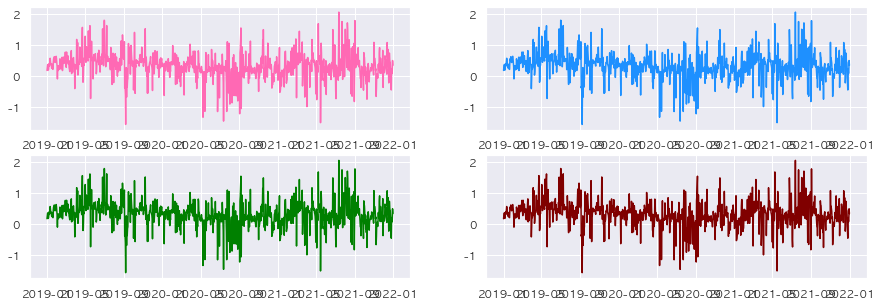

In [17]:
# 로그변환을 하지 않으면 계절성이 조금 남아있는 것을 확인 가능 차분만 진행한 것
fig, ax = plt.subplots(2, 2, figsize=(15,5))
colors = ['hotpink', 'dodgerblue', 'green', 'maroon']
for i, item in enumerate(gu):
    log_gu = np.log1p(train['동대문구'])
    diff =log_gu.diff(periods=365).dropna()
    ax[i // 2, i % 2].plot(diff, color=colors[i])
plt.show()

## SARIMA

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20313D-01    |proj g|=  7.48864D-01

At iterate    5    f=  4.45755D-01    |proj g|=  8.81357D-02

At iterate   10    f=  4.16964D-01    |proj g|=  2.34907D-02

At iterate   15    f=  4.15207D-01    |proj g|=  1.28811D-03

At iterate   20    f=  4.15202D-01    |proj g|=  1.14858D-03

At iterate   25    f=  4.15142D-01    |proj g|=  3.04538D-03

At iterate   30    f=  4.15113D-01    |proj g|=  1.11876D-03

At iterate   35    f=  4.15109D-01    |proj g|=  1.15858D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<AxesSubplot:xlabel='일시'>

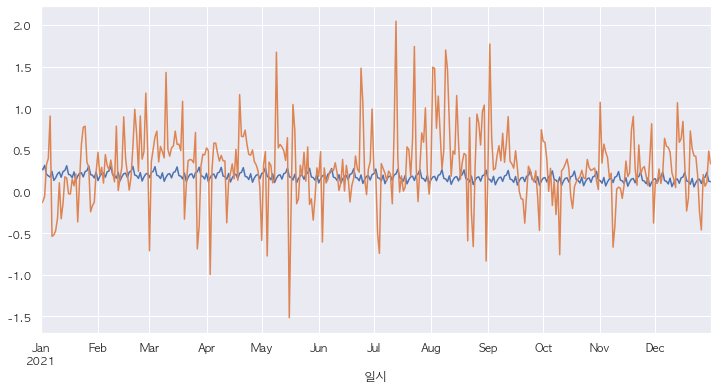

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
log_gu = np.log1p(train['동대문구'])
diff = log_gu.diff(periods=365).dropna()

# 데이터를 훈련용 데이터와 테스트용 데이터로 나누기
train_data = diff.loc["2018-01-01":"2020-12-31"]
test_data = diff.loc["2021-01-01":]

# SARIMA 모델 훈련
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# 테스트용 데이터 예측
start_index = test_data.index.min()
end_index = test_data.index.max()
forecast = result.predict(start=start_index, end=end_index, typ='linear')

# 예측 결과 시각화
forecast.plot()
test_data.plot()

SARIMA 모델에서 예측값이 거의 0에 근접하는 경우는 다양한 이유가 있을 수 있습니다. 예측값이 거의 0이라는 것은 모델이 제대로 학습되지 않았다는 것을 의미하기도 합니다. 따라서 다음과 같은 원인을 살펴볼 수 있습니다.

모델 파라미터 설정 문제: SARIMA 모델에서는 AR, MA, differencing, seasonal AR 및 seasonal MA 파라미터를 설정해야 합니다. 이 파라미터를 잘못 설정하면 모델이 예측을 제대로 수행하지 못할 수 있습니다.<br>
데이터 특성 문제: SARIMA 모델은 시계열 데이터의 정상성과 계절성을 가정하고 있습니다. 만약 데이터가 정상성을 가지지 않거나 계절성이 없는 경우, 모델이 예측을 잘 수행하지 못할 수 있습니다.<br>
데이터 전처리 문제: 데이터를 전처리하는 과정에서 어떤 문제가 발생했을 수도 있습니다. 예를 들어, 차분 또는 로그 변환을 적절하게 수행하지 않았을 수도 있습니다.<br>
데이터 부족 문제: SARIMA 모델은 과거의 데이터를 기반으로 예측을 수행합니다. 따라서 데이터가 충분하지 않으면 모델이 예측을 제대로 수행하지 못할 수 있습니다.<br><br>
이러한 문제를 해결하기 위해서는 모델 파라미터를 재설정하거나, 데이터를 전처리하거나, 데이터를 더 수집하여 모델을 재학습하는 등의 다양한 방법을 시도해 볼 수 있습니다.

In [ ]:
def preprocess(df,holiday_path,makeY=False):
    df_holiday =  pd.read_csv(holiday_path,dtype={'locdate':int})

    holidays = df_holiday['locdate'].apply(lambda x : datetime(year=int(x//1e4), month = int((x%1e4)//100), day=int(x%100)))
    
    df_features = pd.DataFrame()
    df_features['date'] = df['일시'].apply(lambda x : datetime(year=int(x//1e4), month = int((x%1e4)//100), day=int(x%100)))
    df_features['weekday'] = df_features['date'].apply(lambda date : date.weekday()) / 7.0
    df_features['weekend'] =  df_features['date'].apply(lambda date : date.weekday() == 5 or date.weekday() == 6)
    df_features['month'] = df_features['date'].apply(lambda date : date.month) / 12.0
    #df_features['day_of_month']= df_features['date'].apply(lambda date : date.day) 
    df_features['day_of_year'] = df_features['date'].apply(lambda date : date.timetuple().tm_yday) / 365.0 
    df_features['red'] = df_features['date'].isin(holidays) 
    df_features['year'] = df_features['date'].apply(lambda date : date.year) / 2018.0
    df_features['week_of_year']=df_features['date'].apply(lambda date : date.isocalendar()[1]) / 53.0

    df_features['vacation'] = False
    df_features['rainy_season'] = df_features['date'].apply(lambda date : 726 >= date.month*100 + date.day >= 625)

    for i in range(1,df_features.shape[0]-1):
        if df_features["red"][i] & df_features["red"][i-1] & df_features["red"][i+1]:
            df_features.at[i-1,"vacation"] = True
            df_features.at[i,"vacation"] = True
            df_features.at[i+1,"vacation"] = True


    cols_location = ['광진구','동대문구','성동구','중랑구']
    list_df_features_by_loc = []
    for idx, loc in enumerate(cols_location):
        df_new = df_features.copy()
        df_new['loc'] = idx
        if makeY:
            df_new['y']=df[loc]
        list_df_features_by_loc.append(df_new)

    df_ret=pd.concat(list_df_features_by_loc)
    df_ret = df_ret.reset_index(drop=True)

    df_ret = df_ret.drop('date',axis=1)

    return df_ret